In [1]:
%load_ext autoreload
%autoreload 2
#Importing
import sys
import pandas as pd
sys.path.append('../../../')  # 'class_func.py' dosyası üst klasörde olduğu için onu path'e eklendi

import OCPY as cf # 'class_func.py' dosyasını import edildi
import rebound_oc_delay as rd
import numpy as np # numpy kütüphanesini import edildi
from matplotlib import pyplot as plt

# Creating OC_model model components
func = cf.OC_model() 

lite = cf.LiTE_abspar()
lite.mass = cf.Parameter(0.00221103373, std= 1e-2, min=0) 
lite.P_LiTE = cf.Parameter(3191, std=10000, min=0)
lite.ecc = cf.Parameter(0.048, std=.05, min=0, max=1, vary=True)
lite.omega = cf.Parameter(0, std=180, vary=True)
lite.T_LiTE = cf.Parameter(2453629, std=1e4)
lite.inc = cf.Parameter(0, std=90, vary=False)
lite2 = cf.LiTE_abspar()
lite2.mass = cf.Parameter(0.00380084047, std= 1e-2, min=0) 
lite2.P_LiTE = cf.Parameter(8273, std=10000, min=0)
lite2.ecc = cf.Parameter(0.033, std=.05, min=0, max=1, vary=True)
lite2.omega = cf.Parameter(28, std=180)
lite2.T_LiTE = cf.Parameter(2451702, std=1e4)
lite2.inc = cf.Parameter(0, std=90, vary=False)
lite2.name = 'lite2'
lin = cf.Lin()
lin.dP = cf.Parameter(0, std=1e-10)
lin.dT = cf.Parameter(0, std=1e-5)

# Adding model components to OC_model object
func.add_model_component(lite) 
func.add_model_component(lite2)
func.add_model_component(lin)

In [2]:
# Creating OC_data object with data file
data = cf.OC_data(data_file="../ny_vir.xlsx")
data.m1 = 0.471
data.m2 = 0.13
data.inc = 80.7

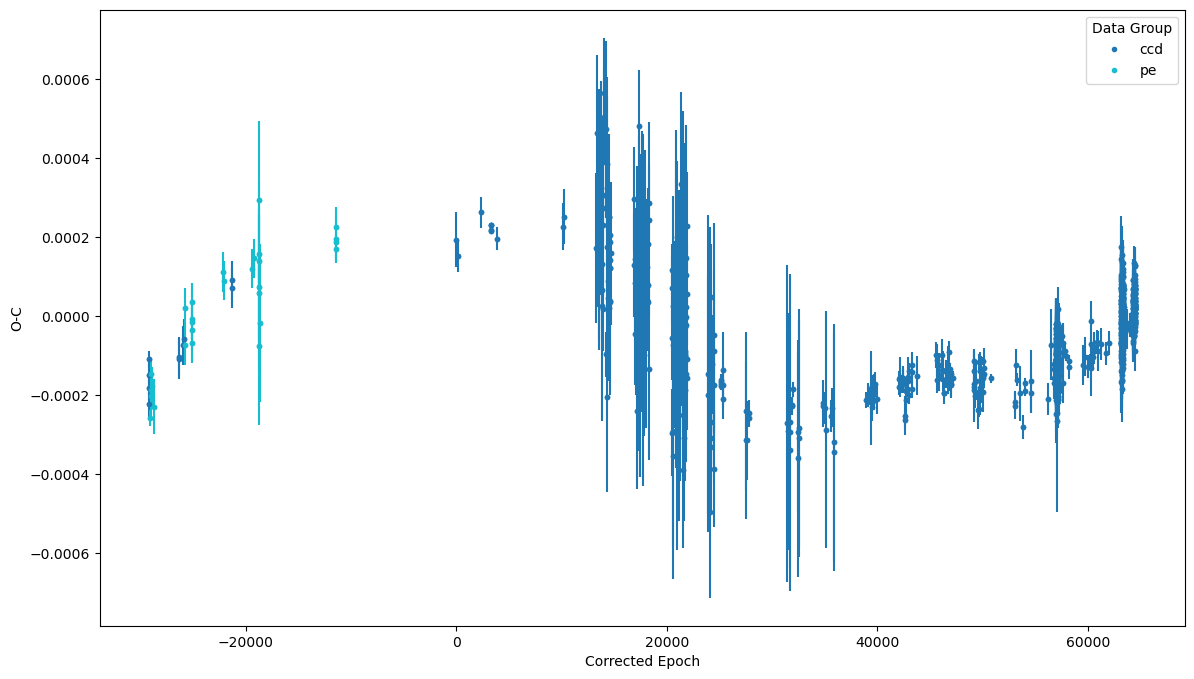

In [3]:
# Plotting OC_data
data.plot_OC()

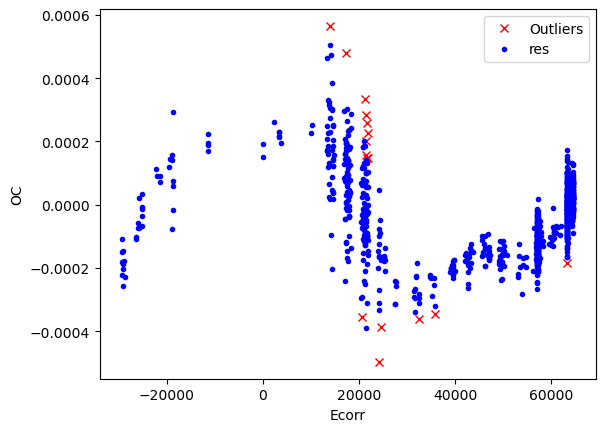

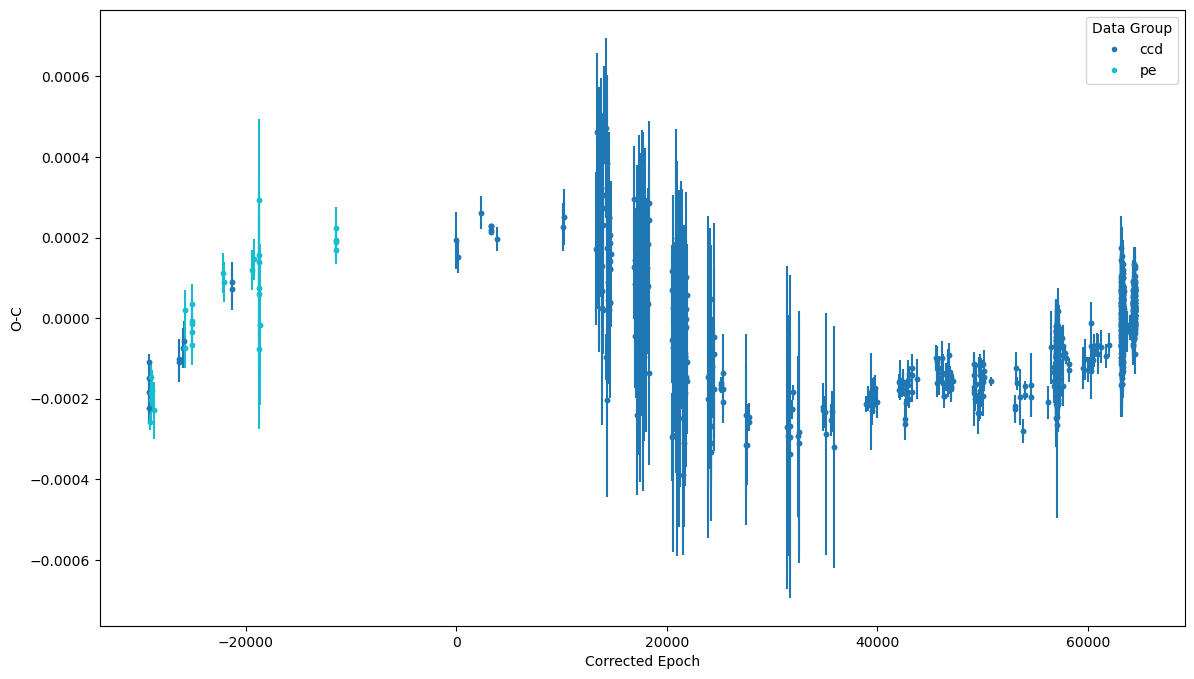

In [4]:
# Clearing outliers
outliers = data.sigma_outliers(treshold=3, plot=True, additional_method="moving_window", additional_params={"window_rate":.1, "window_step_rate":.03})
data = data.remove_outliers(outliers)
true_indexes = [index for index, value in enumerate(outliers) if value]
data.plot_OC()

In [5]:
# Removing ± 3 Sigma Errors

max_error = np.mean(data.Errors) + 3 * np.std(data.Errors)
data = data.filter_data_range(dtype="Errors", max_value=max_error, plot=True)
max_error = np.mean(data.Errors) + 3 * np.std(data.Errors)
data = data.filter_data_range(dtype="Errors", max_value=max_error, plot=True)
max_error = np.mean(data.Errors) + 3 * np.std(data.Errors)
data = data.filter_data_range(dtype="Errors", max_value=max_error, plot=True)
max_error = np.mean(data.Errors) + 3 * np.std(data.Errors)
data = data.filter_data_range(dtype="Errors", max_value=max_error, plot=True)

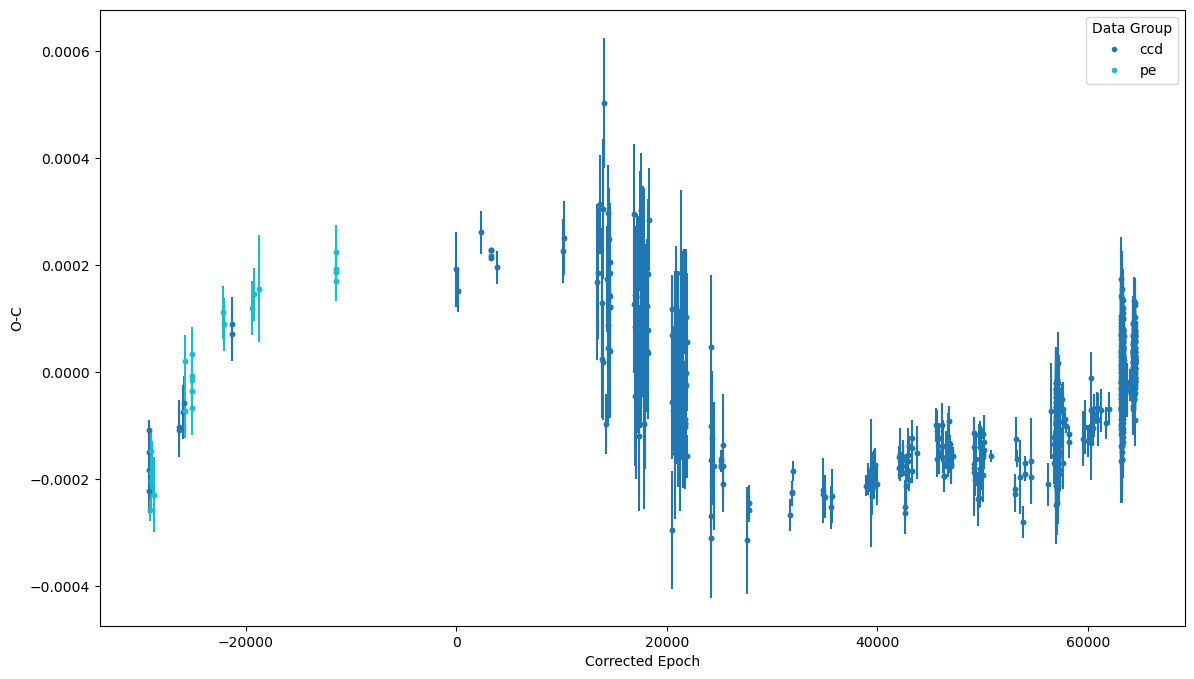

In [6]:
#Ploting data
data.plot_OC()

In [7]:
# Creating fit object with given data
fit = cf.fit(data=data, model=func)

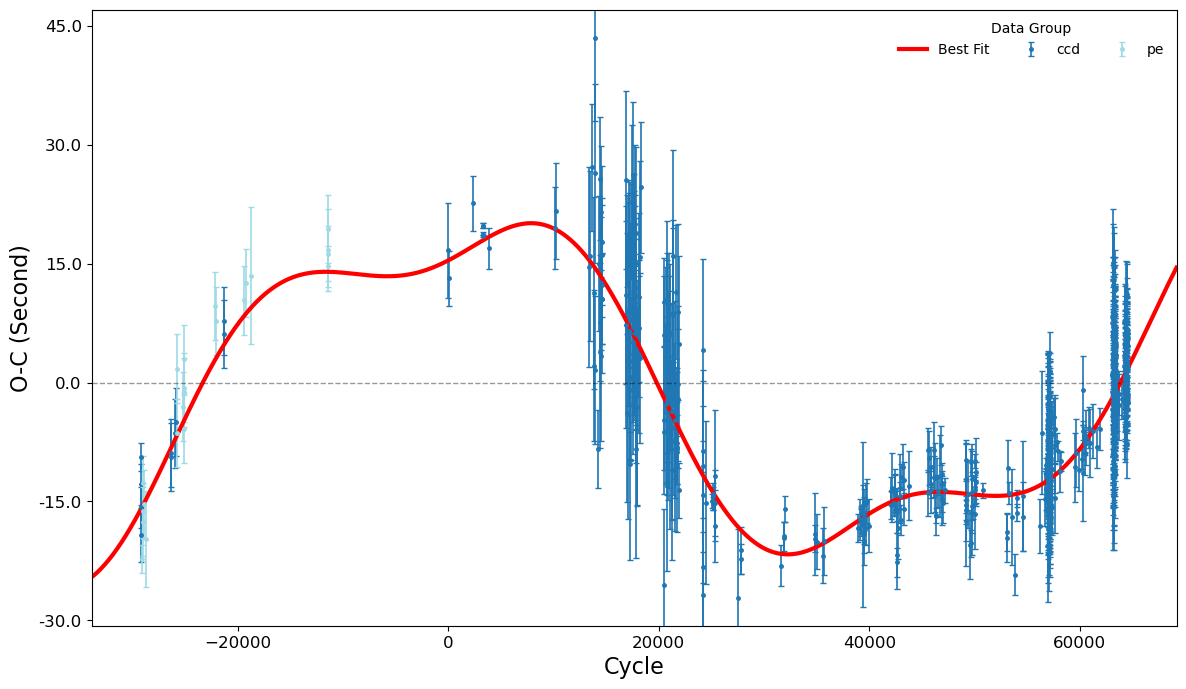

In [8]:
# Plotting fit object with given parameters     
fit.plot()

In [9]:
# end_res = fit.plot(m1=0.471, m2=0.13, inc=80.73)

In [10]:
# Fitting probablistic
samples = fit.fit_model_prob(walker=100, steps=1000, burn_in=600, threads=20, prob_prior=True)

  3%|▎         | 27/1000 [01:57<1:10:21,  4.34s/it]


KeyboardInterrupt: 

In [ ]:
# Clearing samples
samples2 = fit.clear_emcee_sample(samples, clear_count=3, threshold=0)

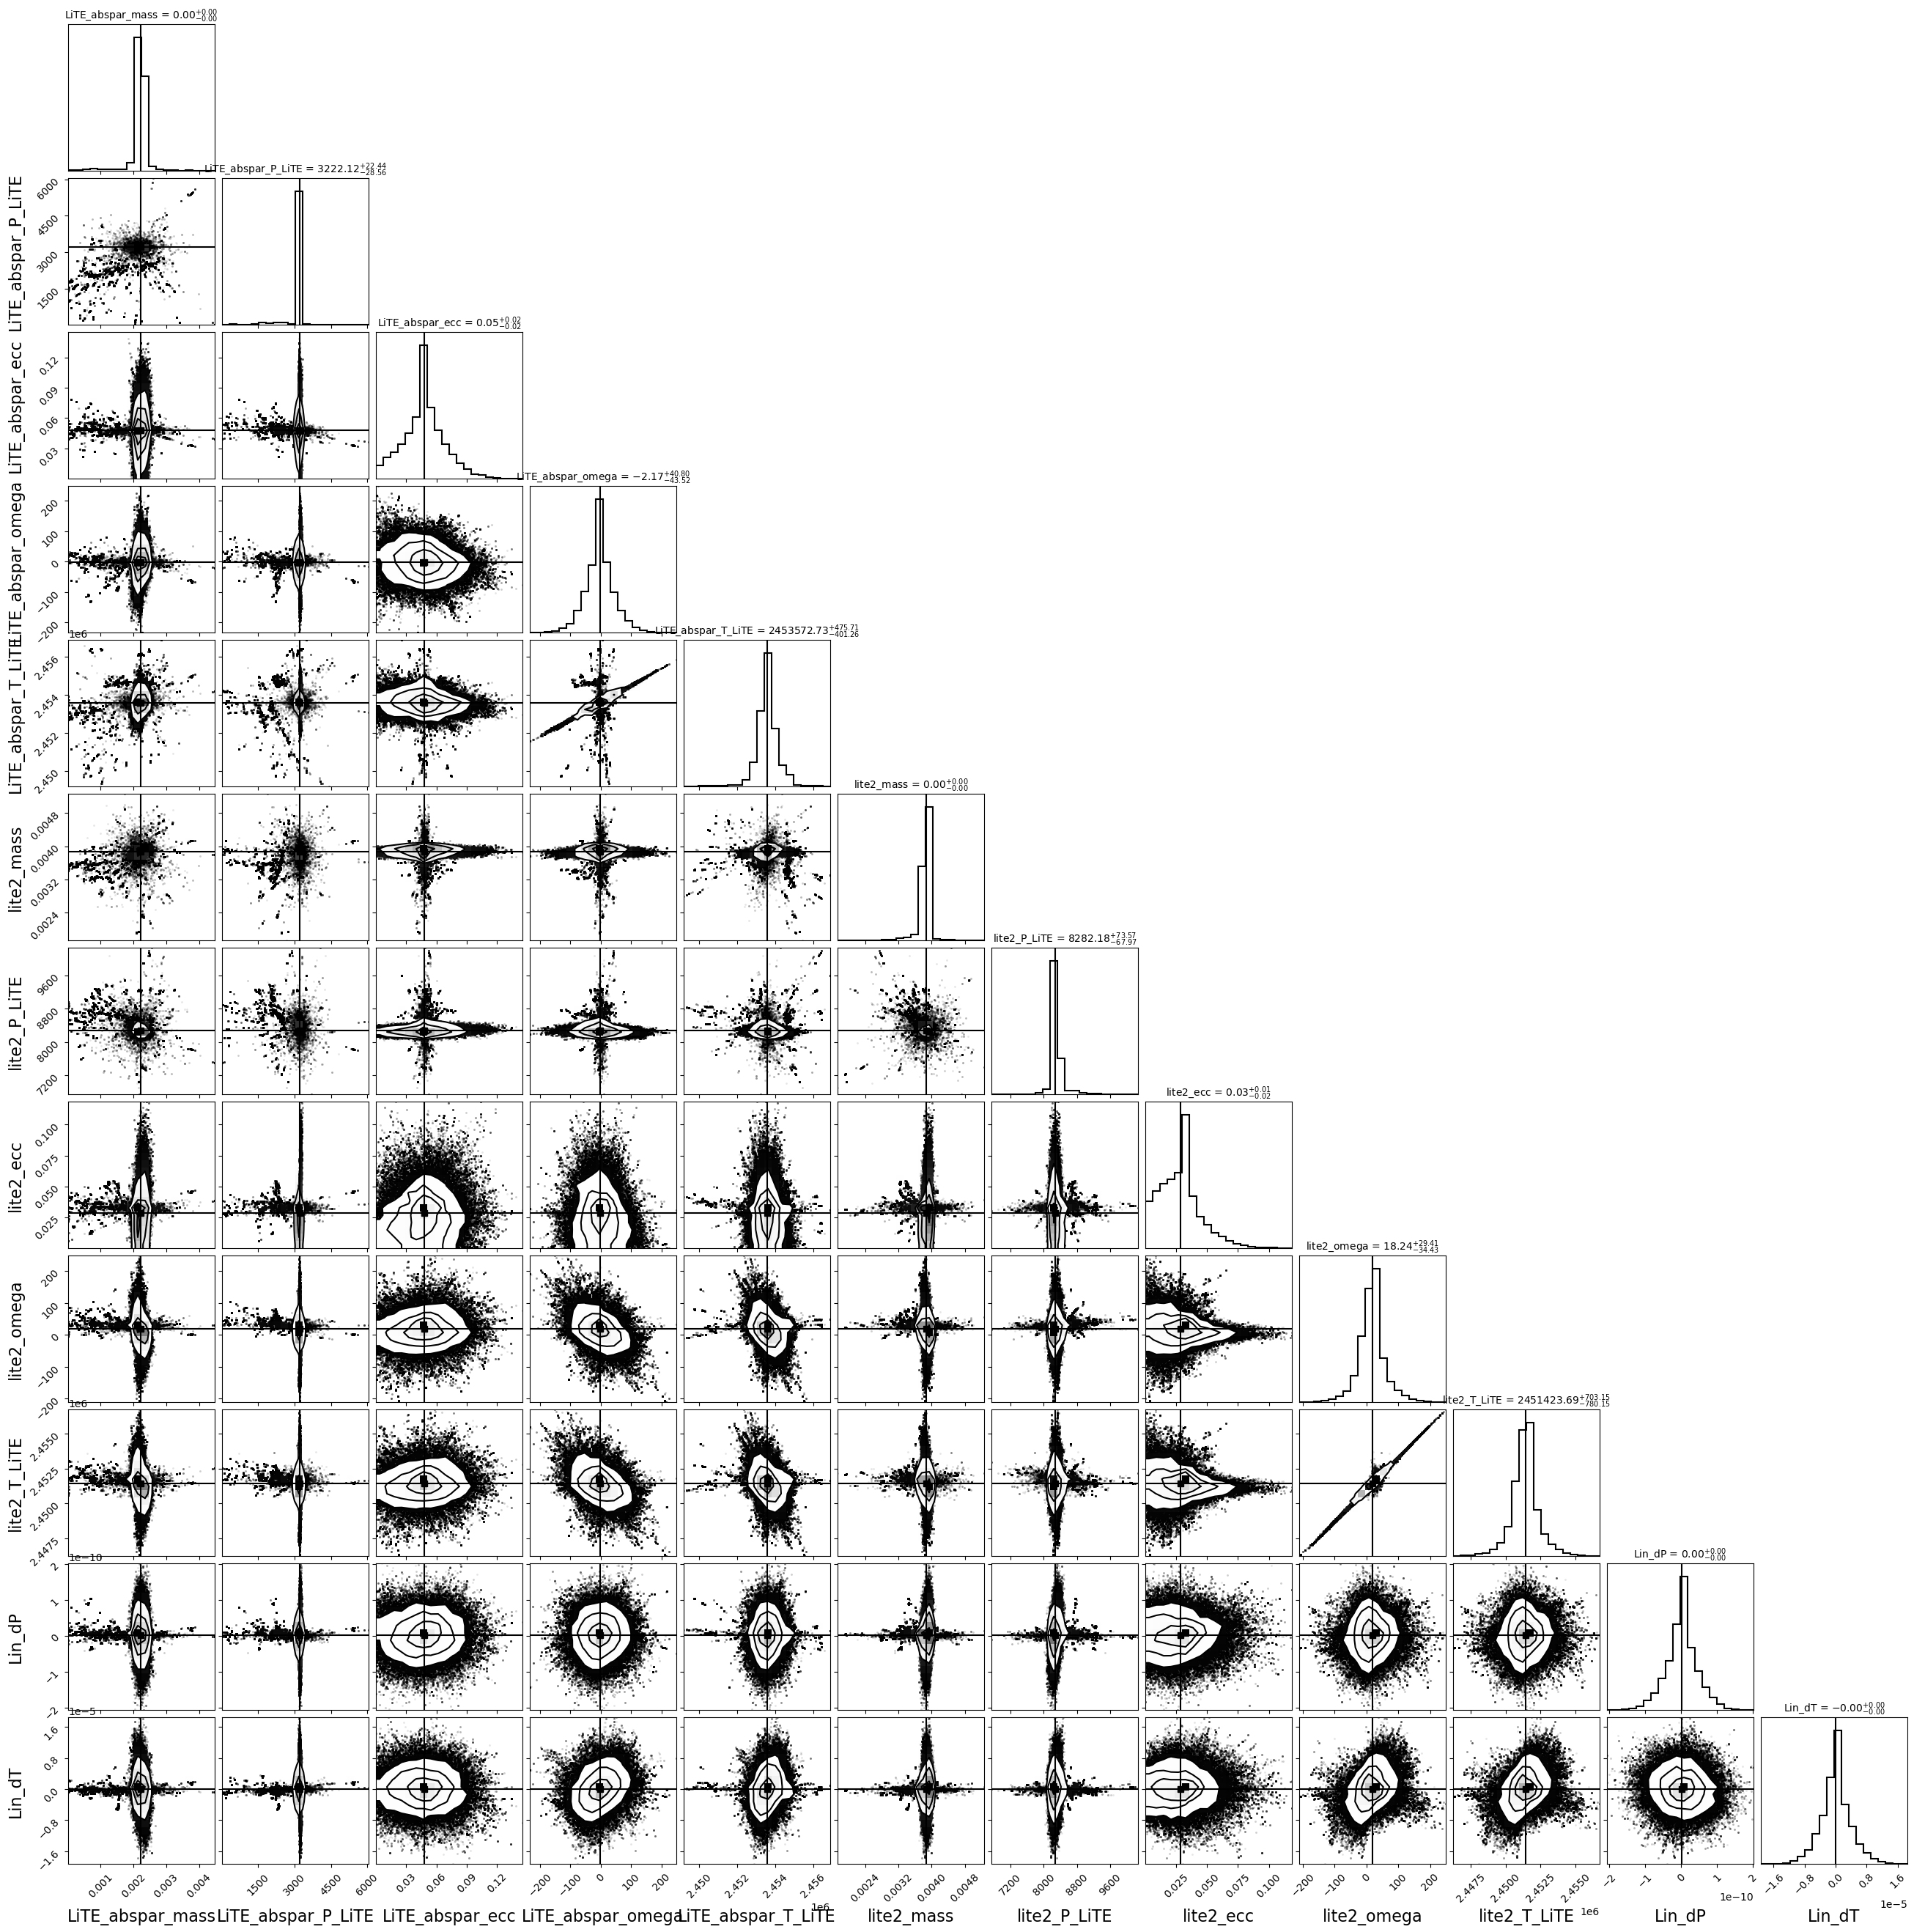

In [ ]:
# Plotting corner plot of new samples
fit.corner_plot(samples2,show=True)

In [ ]:
# Creaing new model with new samples
model2 = fit.create_model_from_samples(samples2)

In [ ]:
# Saving new model as fitted model of fit object
fit.fitted_model=model2

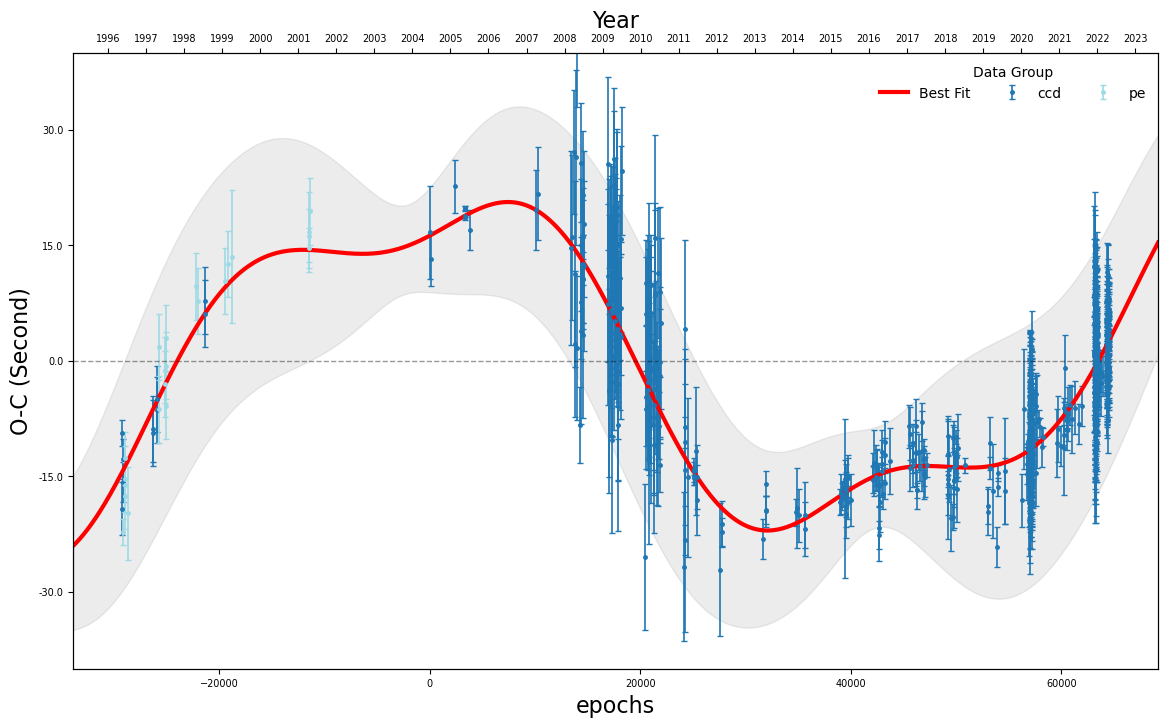

In [ ]:
# Plotting new fitted model
fit.plot(samples=samples2, x_axis_bot="epochs", x_axis_top="year", tick_size=7, y_lim=(-40,40))

In [ ]:
# Getting model params of last fit
fit.model_params()

{'mass': 0.002216501055640814 GM_sun, 'P_LiTE': 3222.1179409903903 epoch, 'ecc': 0.047804081804149925 Unitless, 'omega': -2.1718456336196565 deg, 'T_LiTE': 2453572.7293723277 epoch, 'inc': 0 deg}
{'mass': 0.0038681913390611095 GM_sun, 'P_LiTE': 8282.175722634722 epoch, 'ecc': 0.028717319411509786 Unitless, 'omega': 18.23693832606906 deg, 'T_LiTE': 2451423.6924502 epoch, 'inc': 0 deg}
{'dP': 7.766871817146415e-13 day, 'dT': -3.787094174101728e-08 day}
